Here I'll train, tune and download the CNN image classifier.

In [68]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns
import keras_tuner as kt
import h5py
import gradio as gr 

In [69]:
# Files paths
train_dir = r'D:\Barba\Business\Datascientist/56projects3/CNN/images_cnn/in/Training' 
test_dir = r'D:\Barba\Business\Datascientist/56projects3/CNN/images_cnn/in/Testing' 

In [70]:
# Normalization and Data Augmentation
train_datagen = ImageDataGenerator(rescale=1/255)

test_datagen = ImageDataGenerator(rescale = 1/255, validation_split= 0.3)

In [71]:
# Applying datagenerator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (180, 180),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "rgb",
    subset = "training"
    )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (180, 180),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "rgb",
    subset = "validation"
    )

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (180, 180),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "rgb"
    )

Found 5712 images belonging to 4 classes.
Found 392 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [72]:
# Visualization
def plotImages(images_arr): # funcion para visualizar imagenes
  fig, axes = plt.subplots(1, 5, figsize = (10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

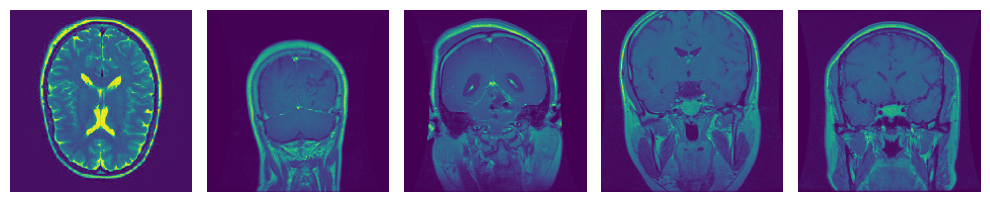

In [73]:
sample_training_images, _= next(train_generator)
plotImages(sample_training_images[10:15])

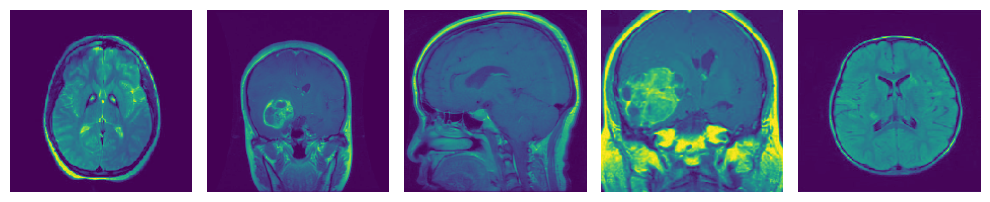

In [74]:
sample_testing_images, __= next(test_generator)
plotImages(sample_testing_images[10:15])

Let's build the model

In [75]:
# Shape
sample_training_images.shape[1:] # 400 pixeles x 400 pixeles x 1 (gray scale)

(180, 180, 3)

In [76]:
# Model structure
model_1 = Sequential()

# conv 1
model_1.add(Conv2D(128, (3,3), activation = "relu", padding='same', kernel_regularizer=regularizers.l2(1e-2), input_shape=(180, 180, 3)))
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2))) 
model_1.add(Dropout(0.3))

# conv 2
model_1.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-2)))
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.3))

# conv 3 
model_1.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-2)))
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(3,3)))
model_1.add(Dropout(0.3))

# Clasification - Flatten - Dense
model_1.add(Flatten()) 
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(4, activation='softmax'))

# summary structure
model_1.summary() 

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 180, 180, 128)     3584      
                                                                 
 activation_49 (Activation)  (None, 180, 180, 128)     0         
                                                                 
 batch_normalization_49 (Bat  (None, 180, 180, 128)    512       
 chNormalization)                                                
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 90, 90, 128)      0         
 g2D)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 90, 90, 128)       0         
                                                                 
 conv2d_50 (Conv2D)          (None, 90, 90, 64)      

In [77]:
# Compiling
model_1.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])

In [78]:
# Training
hist_1 = model_1.fit(
    train_generator, 
    epochs= 1, 
    batch_size=128,
    validation_data = validation_generator
)

 1/45 [..............................] - ETA: 22:54 - loss: 4.7507 - accuracy: 0.1719

KeyboardInterrupt: 

In [ ]:
# Evaluate with test
results_1 = model_1.evaluate(test_generator)

11/11 [==============================] - 24s 2s/step - loss: 3.0022 - accuracy: 0.2334


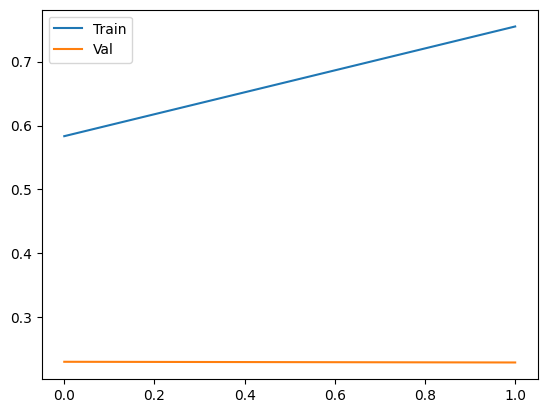

In [ ]:
# Check over-fitting
plt.plot(hist_1.history['accuracy'], label='Train')
plt.plot(hist_1.history['val_accuracy'], label='Val')
plt.legend()
plt.show()